Function: F1
Execution Time: 0.22002053260803223 seconds
Flamingo Search Best Solution: [ 8.79461991e-01 -1.65928160e-02  3.27945790e-01 -3.88438039e-01
  3.05627867e-01  3.11073025e-01 -3.27753921e-01 -1.63201675e-01
  5.91319821e-01  6.90525872e-01 -3.38973557e-01  2.38442802e-01
  6.52667509e-01  3.60935059e-01  6.93415808e-01  1.35084344e+00
  3.42332982e-01  6.90961860e-01 -2.62771844e-01 -3.59647056e-01
 -4.83815905e-01  5.20744410e-02  5.29112841e-01 -2.26445140e-01
 -2.91525788e-02  3.70899471e-02 -2.57687873e-01  3.65367227e-01
  5.98865251e-01  4.20387361e-01  1.29820418e-01 -6.61778946e-02
 -8.32048114e-04 -2.24256053e-01  6.11196338e-01 -2.79979547e-01
 -3.42151842e-01 -1.87186770e-01 -3.19903856e-01  2.86959714e-01
 -2.25630703e-01  4.68979100e-01 -1.56785516e-01  9.72061923e-01
 -5.42079739e-01 -6.98275185e-02  5.15093700e-02 -1.43022296e-01
 -8.46536494e-01 -1.27212037e-01] Objective Value: 10.470262124675761
Iteration		FSA
Iteration 100	FSA: 3.2555e+02
Iteration 200	FSA

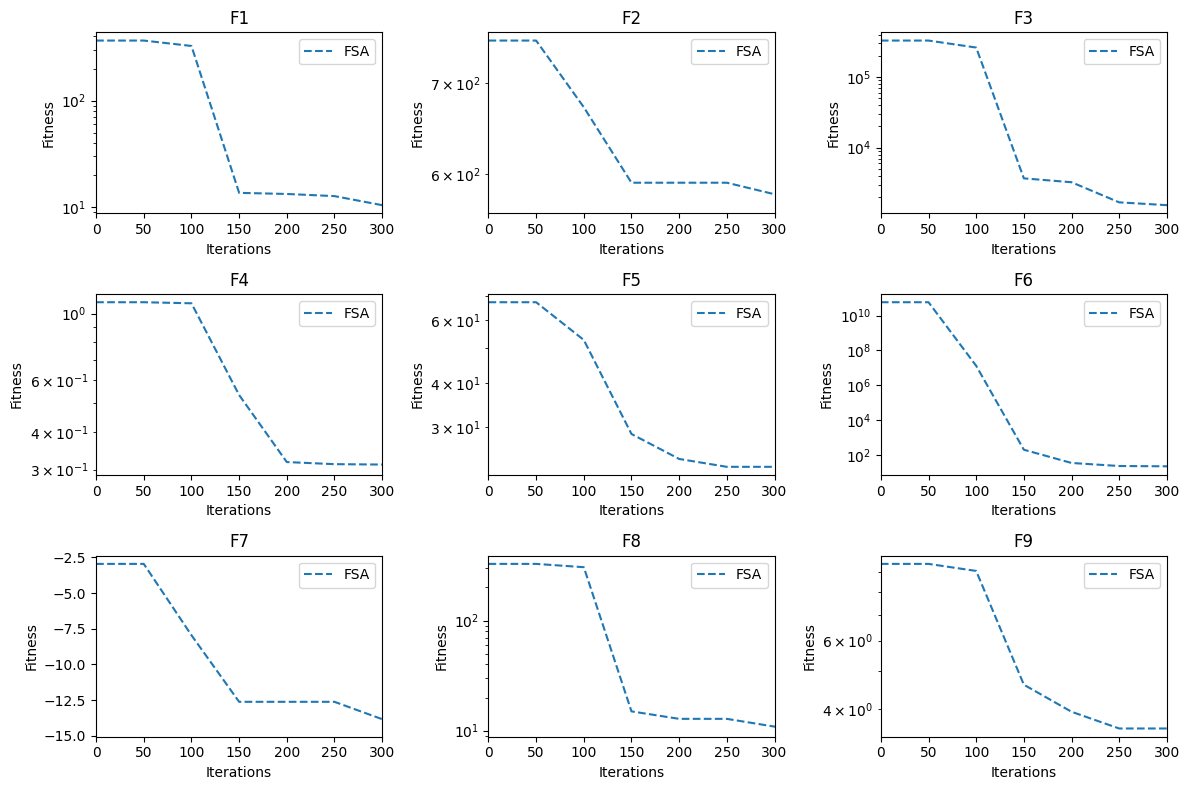

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time
import math

# Objective functions
def F1(x):
    return np.sum(x**2)

def F2(x):
    A = 10  # Modify this constant as needed
    return A * len(x) + sum([(x**2 - A * np.cos(2 * math.pi * x)) for x in x])

def F3(x):
    return np.sum(100 * (x[1:] - x[:-1]**2)**2 + (1 - x[:-1])**2)

def F4(x):
    return 1/4000 * np.sum(x**2) - np.prod(np.cos(x / np.sqrt(np.arange(1, len(x) + 1)))) + 1

def F5(x):  # Alpine Function
    return np.sum(np.abs(x * np.sin(x) + 0.1 * x))

def F6(x):
    sum = 0
    sum1 = 1
    for i in range(len(x)):
        sum += np.abs(x[i])
        sum1 *= np.abs(x[i])
    return sum + sum1

def F7(x):  # Michalewicz Function
    m = 10
    return -np.sum(np.sin(x) * np.sin(((np.arange(1, len(x) + 1) * x**2) / np.pi)**(2 * m)))

def F8(x):
    sum = 0
    for i in range(len(x)):
        sum += (x[i] + 0.5) * (x[i] + 0.5)
    return sum

def F9(x):
    n = len(x)
    return -20 * np.exp(-0.2 * np.sqrt(np.sum(x**2) / n)) - np.exp(np.sum(np.cos(2 * np.pi * x)) / n) + 20 + np.exp(1)

# Flamingo Search Algorithm
def flamingo_search(objective_function, initial_solution, n_iter, n_flamingos, sigma):
    best_solution = initial_solution
    best_objective_value = objective_function(best_solution)
    convergence = [best_objective_value]

    for i in range(n_iter):
        flamingos = [best_solution + np.random.normal(scale=sigma, size=len(best_solution)) for _ in range(n_flamingos)]
        for f in flamingos:
            f_value = objective_function(f)
            if f_value < best_objective_value:
                best_solution = f
                best_objective_value = f_value
        if i % 50 == 0:
            convergence.append(best_objective_value)

    convergence.append(best_objective_value)  # Final value at iteration 100
    return best_solution, convergence

# Function to format results for Iteration 100, 200, 300 (FSA only)
def format_results_fs(fs_convergence):
    results = []
    for i in [100, 200, 300]:
        fs_fitness = fs_convergence[i // 50]
        results.append(f"Iteration {i}\tFSA: {fs_fitness:.4e}")
    return results

# Function to create population
def create_population(size, dim, lb=-5, ub=5):
    return np.random.uniform(lb, ub, (size, dim))

# Main Loop to Test All Functions (FSA only)
functions = [F1, F2, F3, F4, F5, F6, F7, F8, F9]
function_names = ["F1", "F2", "F3", "F4", "F5", "F6", "F7", "F8", "F9"]

n_iter = 300  # Number of iterations for FSA
n_flamingos = 100  # Number of Flamingos
sigma = 0.5  # Step size in FSA
dim = 50  # Dimension of the problem
lb = -5
ub = 10

fig, axs = plt.subplots(3, 3, figsize=(12, 8))
axs = axs.ravel()

for i, (func, func_name) in enumerate(zip(functions, function_names)):
    # Step 0: Initial random solutions and select the best
    initial_population = create_population(10, dim)
    initial_objective_values = np.array([func(ind) for ind in initial_population])
    best_initial_index = np.argmin(initial_objective_values)
    initial_solution = initial_population[best_initial_index]
    initial_value = initial_objective_values[best_initial_index]

    time_start = time.time()

    # Flamingo Search
    fs_best_solution, fs_convergence = flamingo_search(func, initial_solution, n_iter, n_flamingos, sigma)
    fs_convergence.insert(0, initial_value)  # Insert initial value at the beginning

    time_end = time.time()

    # Print Results (FSA only)
    print(f"Function: {func_name}")
    print("Execution Time:", time_end - time_start, "seconds")
    print("Flamingo Search Best Solution:", fs_best_solution, "Objective Value:", func(fs_best_solution))

    # Format and print results for iterations 100, 200, 300 (FSA only)
    formatted_results = format_results_fs(fs_convergence)
    print("Iteration\t\tFSA")
    for result in formatted_results:
        print(result)  # Printing the detailed iteration results

    # Plot Convergence Comparison (FSA only)
    x_points = np.arange(0, len(fs_convergence) * 50, 50)  # Adjust x_points to match the interval

    # Check lengths of convergence array and adjust if necessary
    fs_convergence = fs_convergence[:len(x_points)]

    axs[i].plot(x_points, fs_convergence, label='FSA', linestyle='--')
    axs[i].set_title(func_name)
    axs[i].set_xlabel('Iterations')
    axs[i].set_ylabel('Fitness')    
    if func_name != "F7":
        axs[i].set_yscale('log')  
    axs[i].legend()
    axs[i].set_xlim(0, 300)

plt.tight_layout()
plt.show()
